In [1]:
!pip install pydicom

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pydicom
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import os

In [4]:
# Función para cargar imágenes y etiquetas de un directorio DICOM
def load_dicom_images_and_labels(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if ".dcm" in filename:
            filepath = os.path.join(directory, filename)
            dicom_file = pydicom.dcmread(filepath)

            # Extraer la imagen
            img_array = dicom_file.pixel_array
            img_array = img_array / np.max(img_array)  # Normalización

            # Extraer la etiqueta del estado del paciente
            if 'PatientState' in dicom_file:
                patient_state = dicom_file.PatientState
                if patient_state == 'Signal absent':
                    label = 0
                else:
                    label = 1
            else:
                # Si no hay información de PatientState, manejar de manera especial
                label = None  # Omitir o asignar un valor por defecto

            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

# Carga de datos para múltiples sujetos
data_dir = "/content/drive/MyDrive/RDP"
all_images = []
all_labels = []

for i in range(1, 6):
    subject_dir = os.path.join(data_dir, f"subject_{i}")
    subject_images, subject_labels = load_dicom_images_and_labels(subject_dir)
    all_images.append(subject_images)
    all_labels.append(subject_labels)

# Convertir listas de listas en un único arreglo numpy para imágenes y etiquetas
all_images = np.concatenate(all_images, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

In [5]:
all_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.3, random_state=108)

# Construir el modelo
model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),  # Ajustar según el tamaño de tus imágenes
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Asumiendo clasificación binaria
])

model.compile(loss='mse', metrics=['mae'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

# Evaluar el modelo
model.evaluate(X_test, y_test)

Epoch 1/20
6/6 [==============================] - 6s 295ms/step - loss: 0.5797 - mae: 0.6227 - val_loss: 0.6500 - val_mae: 0.6500
Epoch 2/20
6/6 [==============================] - 1s 188ms/step - loss: 0.6089 - mae: 0.6089 - val_loss: 0.6500 - val_mae: 0.6500
Epoch 3/20
6/6 [==============================] - 1s 189ms/step - loss: 0.6089 - mae: 0.6089 - val_loss: 0.6500 - val_mae: 0.6500
Epoch 4/20
6/6 [==============================] - 1s 157ms/step - loss: 0.6089 - mae: 0.6089 - val_loss: 0.6500 - val_mae: 0.6500
Epoch 5/20
6/6 [==============================] - 1s 182ms/step - loss: 0.6089 - mae: 0.6089 - val_loss: 0.6500 - val_mae: 0.6500
Epoch 6/20
6/6 [==============================] - 1s 158ms/step - loss: 0.6089 - mae: 0.6089 - val_loss: 0.6500 - val_mae: 0.6500
Epoch 7/20
6/6 [==============================] - 1s 166ms/step - loss: 0.6089 - mae: 0.6089 - val_loss: 0.6500 - val_mae: 0.6500
Epoch 8/20
6/6 [==============================] - 1s 180ms/step - loss: 0.6089 - mae: 0.60

[0.569767415523529, 0.569767415523529]

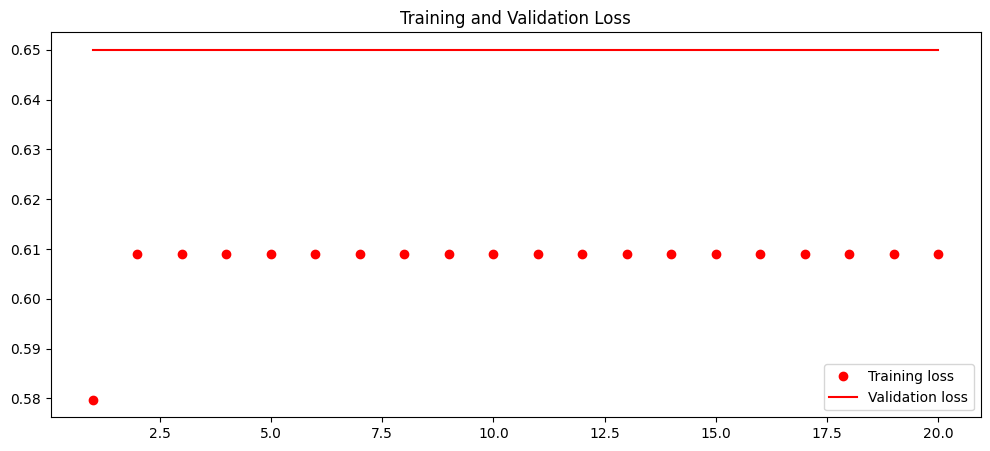

In [7]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, 20 + 1)
    plt.figure(figsize=(12, 5))
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

plot_training_history(history)

In [8]:
# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(all_images, all_labels, test_size=0.3, random_state=108)

# Construir el modelo
model = Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[2])),  # Ajustar según el tamaño de tus imágenes
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Asumiendo clasificación binaria
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Evaluar el modelo
model.evaluate(X_test, y_test)

Epoch 1/20
5/5 [==============================] - 7s 520ms/step - loss: 72.7470 - accuracy: 0.4654 - val_loss: 83.0150 - val_accuracy: 0.5500
Epoch 2/20
5/5 [==============================] - 1s 215ms/step - loss: 51.9042 - accuracy: 0.6101 - val_loss: 15.4162 - val_accuracy: 0.4500
Epoch 3/20
5/5 [==============================] - 1s 231ms/step - loss: 44.1754 - accuracy: 0.5975 - val_loss: 23.3654 - val_accuracy: 0.5500
Epoch 4/20
5/5 [==============================] - 1s 225ms/step - loss: 39.3898 - accuracy: 0.5786 - val_loss: 4.4246 - val_accuracy: 0.6500
Epoch 5/20
5/5 [==============================] - 1s 212ms/step - loss: 27.0108 - accuracy: 0.5535 - val_loss: 18.5373 - val_accuracy: 0.4500
Epoch 6/20
5/5 [==============================] - 1s 229ms/step - loss: 25.1761 - accuracy: 0.5346 - val_loss: 35.5423 - val_accuracy: 0.4500
Epoch 7/20
5/5 [==============================] - 1s 230ms/step - loss: 19.1197 - accuracy: 0.5220 - val_loss: 2.9395 - val_accuracy: 0.4500
Epoch 8/

[0.45073235034942627, 0.8372092843055725]

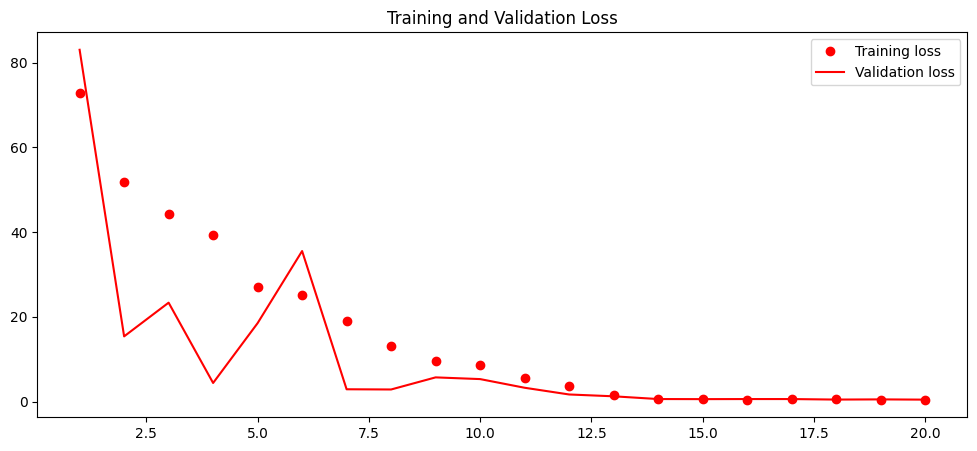

In [9]:
plot_training_history(history)

### Análisis de los Resultados del Entrenamiento del Modelo de Redes Neuronales

#### Inicial
En el primer ploteo de las curvas de training loss y validation loss, se observa que ambas métricas se quedan estancadas. Esto puede deberse a varias razones:

- **Pocas épocas de entrenamiento**: El número de épocas considerado fue insuficiente para que el modelo aprenda adecuadamente de los datos.
- **Falta de optimizador adecuado**: No se usó un optimizador como Adam, que es conocido por su eficacia en la mayoría de los problemas de aprendizaje profundo.
- **Métrica inadecuada**: Se utilizó la métrica de mean squared error (MSE), que puede no ser la más adecuada para el tipo de problema tratado (clasificación binaria en este caso).

Además, no se observó un overfitting acentuado, lo que indica que el modelo no estaba aprendiendo suficiente información para siquiera comenzar a sobreajustar los datos.

#### Mejoras Implementadas
Después de varias iteraciones, se realizaron las siguientes mejoras en el modelo:

- **Uso de Dropout**: Se añadió una capa de Dropout con una tasa de 0.5 para prevenir el sobreajuste.
- **Optimizador Adam**: Se adoptó el optimizador Adam, que es más eficiente y adecuado para este tipo de problemas.
- **Métrica de binary_crossentropy**: Se cambió la métrica a binary_crossentropy, que es más apropiada para problemas de clasificación binaria.

Con estas mejoras, se observó un progreso significativo en el aprendizaje del modelo. Las curvas de training loss y validation loss mostraron una tendencia a mejorar relativamente, indicando que el modelo estaba aprendiendo de los datos y generalizando mejor. No hubo un overfitting acentuado, lo que sugiere que las técnicas de regularización y el optimizador estaban funcionando adecuadamente y resalta la baja cantidad de imágenes para el entrenamiento.

#### Limitaciones de Datos y Recursos
Es importante mencionar que la cantidad de imágenes de cáncer de mama utilizadas fue muy limitada a 285 en total, debido a que se sobrepasaba el límite computacional de RAM de Google Colab y me fue imposible usar más datos. Esto ocasiona el bajo progreso del algoritmo. \\
*Se usó la base de datos VICTRE de TCIA y como target el "Patient state"